## SVM

To demonstrate the SVM, it is easiest to work in low dimensions, so we can see the data.

### Linear SVM Classifier

Let's generate some data i two dimension, and make them a little separated.

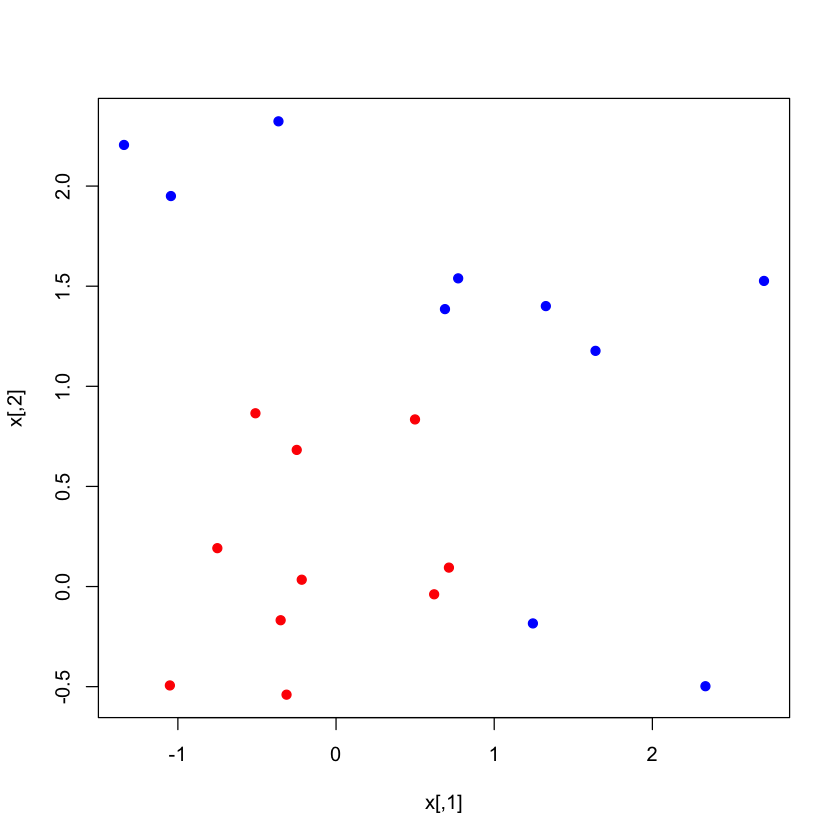

In [2]:
set.seed(10111)
x=matrix(rnorm(40), 20, 2)
y=rep(c(-1, 1), c(10, 10))
x[y==1,]=x[y==1,] + 1
plot(x,col=y+3, pch=19)

Now we will load the package `e1071` which contains the `svm` function we will use. We then compute the fit. Notice that we have to specify a `cost` parameter, which is a tuning parameter.


Call:
svm(formula = y ~ ., data = dat, kernel = "linear", cost = 10, scale = FALSE)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  6



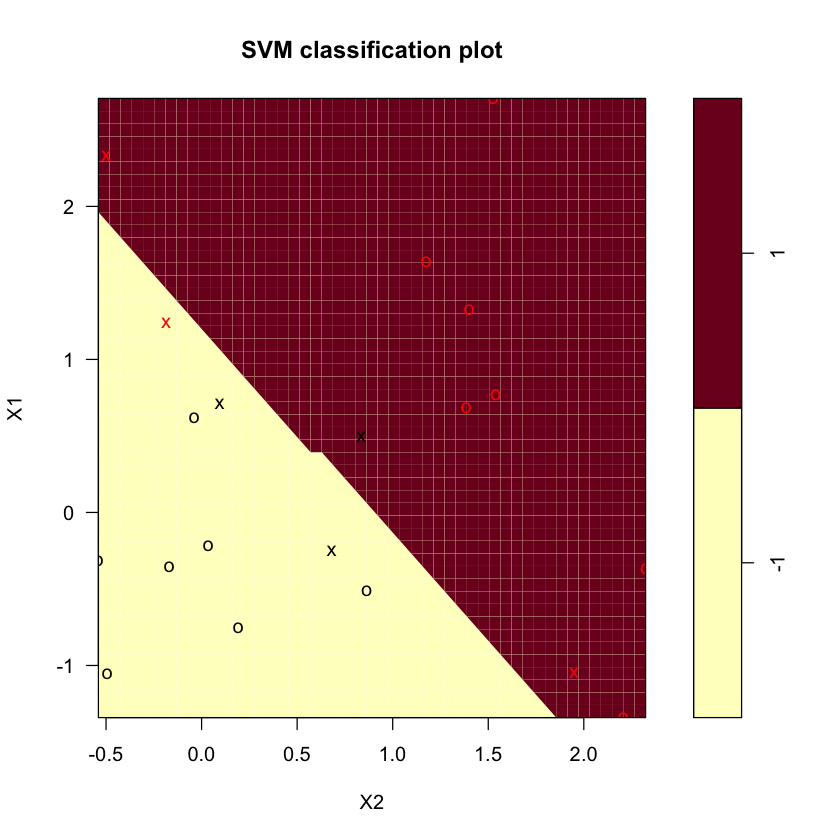

In [7]:
library(e1071)
dat=data.frame(x, y=as.factor(y))
svmfit=svm(y~., data=dat, kernel='linear', cost=10, scale=FALSE)
print(svmfit)
plot(svmfit,dat)

As mentioned in the cahpter, the plot function is somewhat crude, and plots X2 on the horizontal axis (unlike what R would do automatically for a matrix). Lets see how we might make our own plot.

The first thing we will do is make a grid of values for X1 and X2. We will write a function to do that, in case we want to reuse it. it uses the handy function `expand.grid`, and produces the coordinates of `n*n` points on a lattince covering the domain of `x`. Having made the lattice, we make a prediction at each point on the lattice. We then plot the lattice, colr-coded accoring to the classification. Now we can see the decision boundary.

The support points are indexed in the `$index` component of the fit.

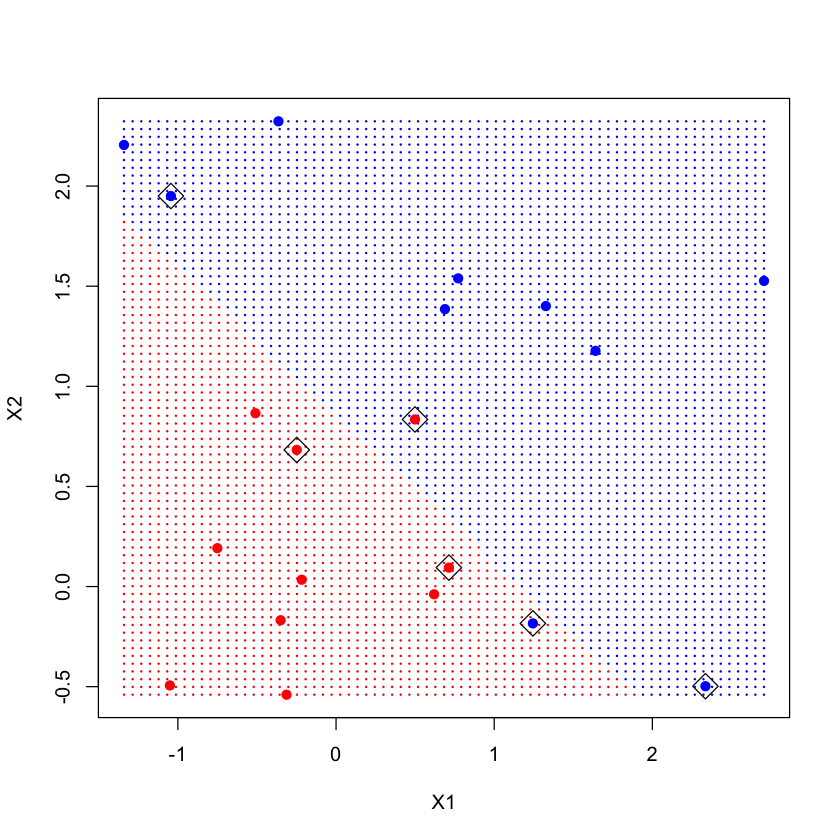

In [18]:
make.grid=function(x, n=75){
    grange=apply(x, 2, range)
    x1 = seq(from=grange[1,1], to=grange[2, 1], length=n)
    x2 = seq(from=grange[1,2], to=grange[2, 2], length=n)
    expand.grid(X1=x1, X2=x2)
}
xgrid=make.grid(x)
ygrid=predict(svmfit, xgrid)
plot(xgrid, col=c('red', 'blue')[as.numeric(ygrid)], pch=20, cex=.2)
points(x, col=y+3, pch=19)
points(x[svmfit$index,], pch=5, cex=2)

The `svm` function is not too friendly, in that we have to some work to get back the linear coefficients, as described in the text. Here we will use a formula to extract the coefficients.

We extract the linear coefficients, and the using simple algebra, we include the decision boundary and the two margins.

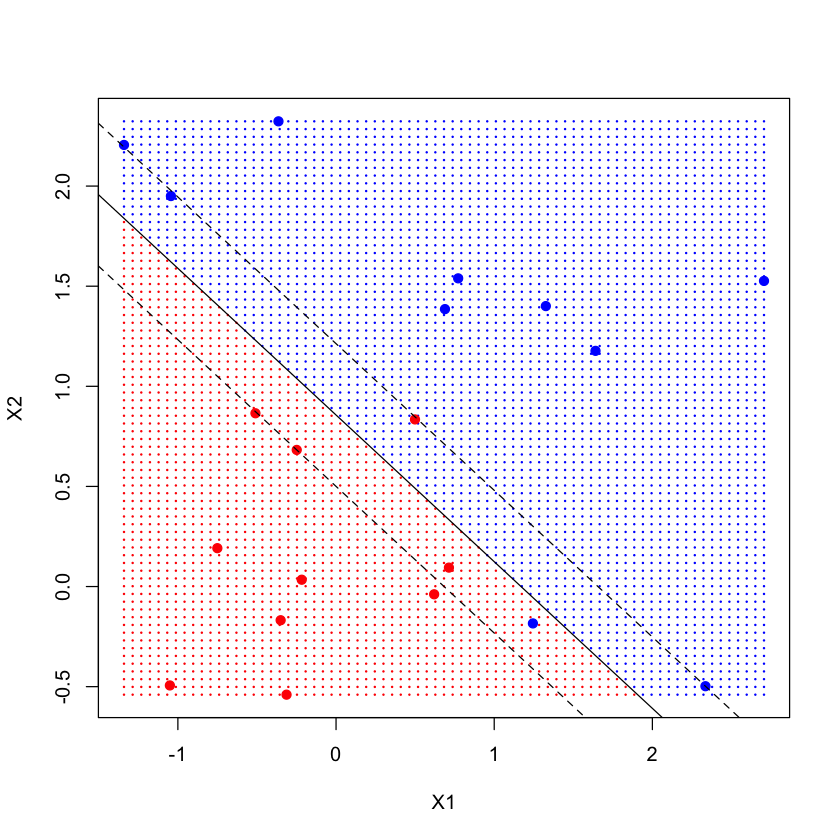

In [22]:
beta=drop(t(svmfit$coefs)%*%x[svmfit$index,])
beta0=svmfit$rho
plot(xgrid, col=c('red', 'blue')[as.numeric(ygrid)], pch=20, cex=.2)
points(x, col=y+3, pch=19)
abline(beta0/beta[2], -beta[1]/beta[2])
abline((beta0-1)/beta[2], -beta[1]/beta[2], lty=2)
abline((beta0+1)/beta[2], -beta[1]/beta[2], lty=2)

### Nonlinear SVM

Instead, we will run the SVM on some data where a non-linear boundary is called for. We will use the mixture data from ESL

In [26]:
load(url("https://web.stanford.edu/~hastie/ElemStatLearn/datasets/ESL.mixture.rda"))
names(ESL.mixture)
rm(x, y)
attach(ESL.mixture)

[1] "x"        "y"        "xnew"     "prob"     "marginal" "px1"      "px2"     
[8] "means"

Warning message in rm(x, y):
“object 'x' not found”Warning message in rm(x, y):
“object 'y' not found”

These data are also two dimensional. Lets plot them and fit a nonlinear SVM, using a radial kernel.

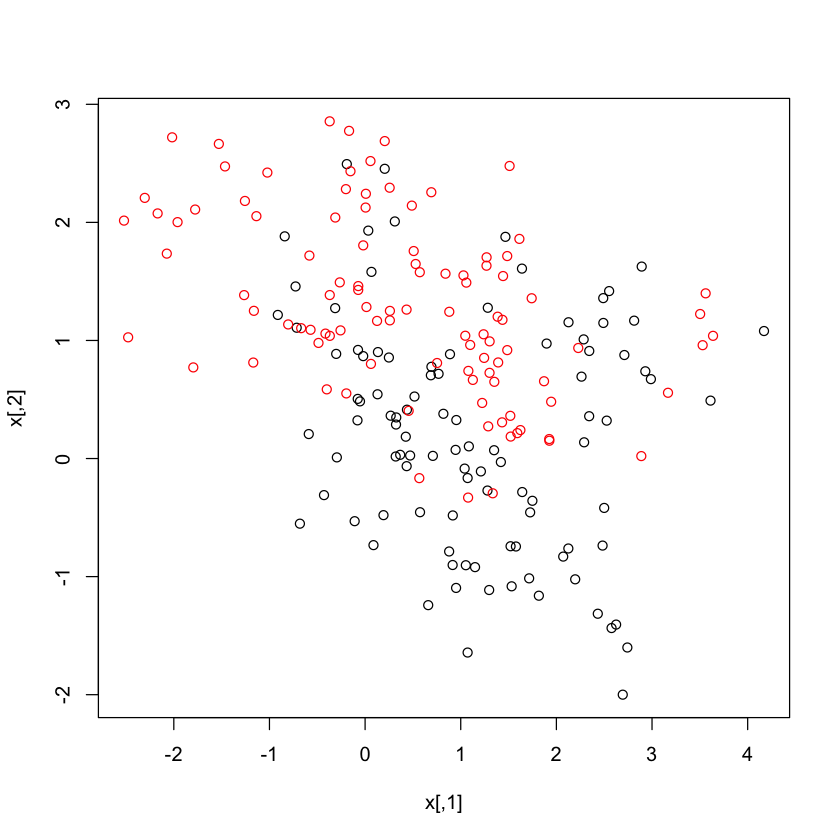

In [27]:
plot(x, col=y+1)
dat=data.frame(y=factor(y),x)
fit=svm(factor(y)~., data=dat, scale=FALSE, kernel='radial', cost=5)

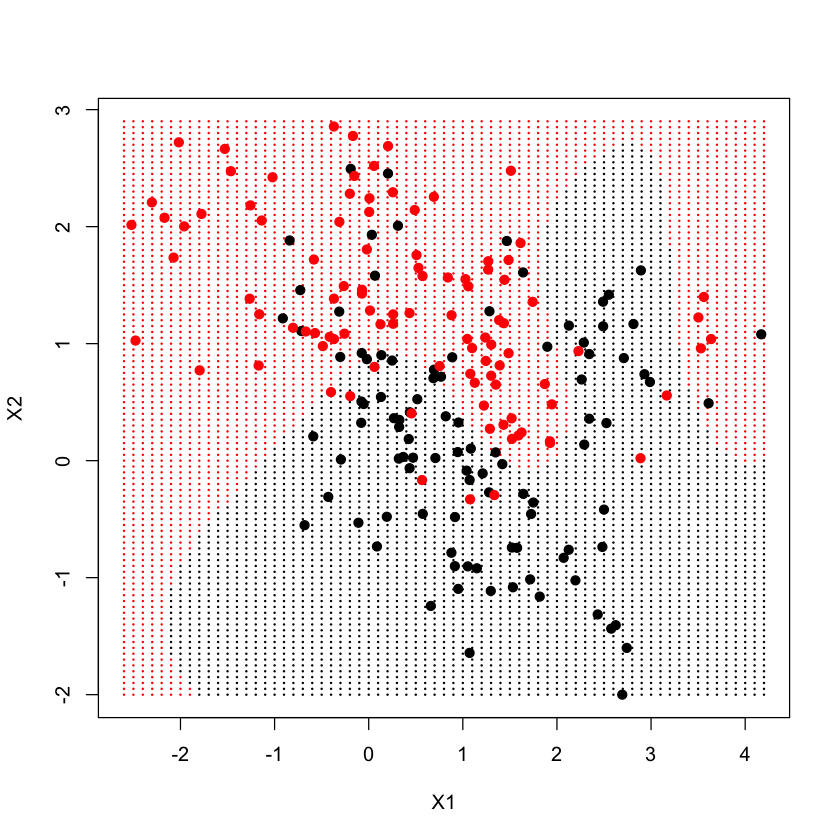

In [30]:
xgrid=expand.grid(X1=px1, X2=px2)
ygrid=predict(fit,xgrid)
plot(xgrid, col=as.numeric(ygrid), pch=20, cex=.2)
points(x, col=y+1, pch=19)

We can go further, and have the predict function produce the actual function estimates at each of our grid points. We can include the actual decision boundary on the plot by making use of the contour function. On the dataframe is also `prob`, which is the true probability of class 1 for these data, at the gridpoints. If we plot its 0.5 countour, that will give us the _Bayes Decision Boundary_, which is the best one could ever do.

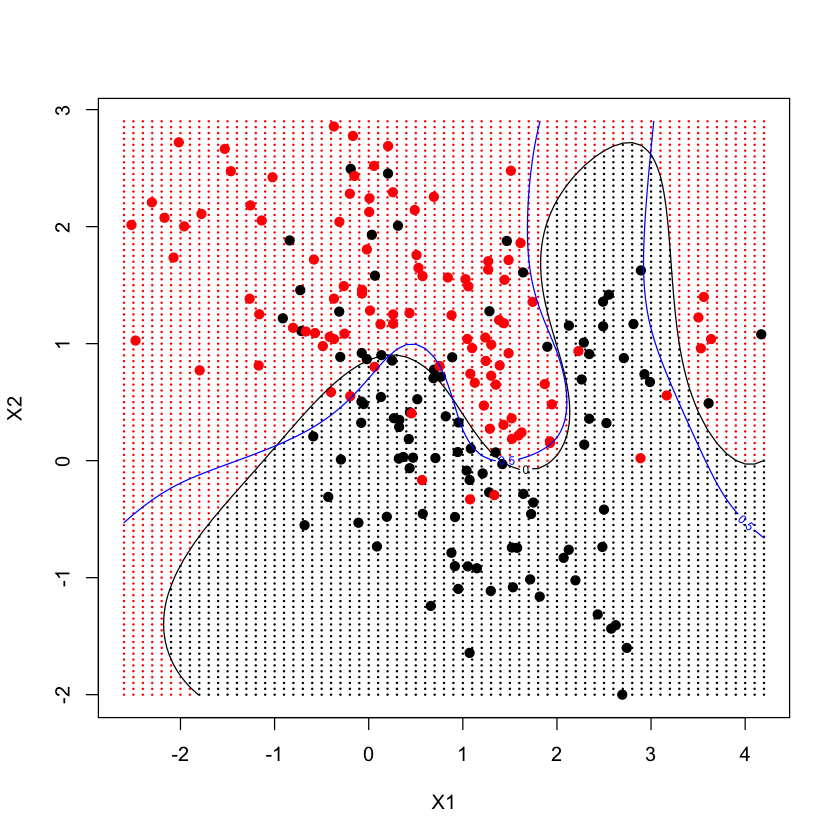

In [38]:
func=predict(fit, xgrid, decision.values = TRUE)
func=attributes(func)$decision

xgrid=expand.grid(X1=px1, X2=px2)
ygrid=predict(fit,xgrid)
plot(xgrid, col=as.numeric(ygrid), pch=20, cex=.2)
points(x, col=y+1, pch=19)

contour(px1, px2, matrix(func, 69, 99), level=0, add=TRUE)
contour(px1, px2, matrix(prob, 69, 99), level=.5, add=TRUE, col='blue')